<a href="https://colab.research.google.com/github/rinkeshdas01/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Ashish Thakur
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Problem Statement-Credit card default happens when you have become severely delinquent on your credit card payments. In case of a credit card payment default, the banks have to go through unnecessary trouble and banks are not willing to do so.

The project involves the following steps:-
1.	Data Cleaning
2.	EDA
3.	SMOTE
4.	Model Training and Implementation
5.	Model Evaluation and Validation

After performing the following steps the following conclusions were obtained:-

•	While validating the models more importance should be given to 'recall scores' since the priority of the banks is to identify a potential defaulter. Whereas if a user is wrongly detected as a potential defaulter there will not be much problem.

•	Some of the models perform bad on both the train and test data. (Logistic Regression, SVC). They seem to be underfitting the train data.

•	Some of the models perform good on train data but not so good on the train data. (Decision Tree Classifier). They seem to be overfitting the train data.

•	Random Forest, XG Boost, Gaussian Naïve Bayes gives us decent recall scores that are 0.82, 0.84, 0.89 respectively. Whereas KNN gives a very good recall score of 0.94.

•	So we can select KNN as the optimum model for our problem statement.


# **GitHub Link -**

# **Problem Statement**




*  We are all aware what a credit card is. It is a type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. Upon making a payment through a credit card, the user has to repay the amount to the bank either in a one-time-payment or in the form of monthly installments.

*  Credit card default happens when you have become severely delinquent on your credit card payments. Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

*  In case of a credit card payment default, the banks have to bear unnecessary trouble.

*  The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import f1_score as f1
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
import warnings
warnings.simplefilter(action='ignore')

### Dataset Loading

In [3]:
pip install --upgrade xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pwd()

'C:\\Users\\ashis\\completed_projects\\cLASSIFICATION_PROJECT'

In [5]:
import os 
os.chdir('C:\\Users\\ashis\\Downloads')

In [6]:
df=pd.read_excel("credit_card.xls",header=1)

### Dataset First View

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset contains 30000 rows and 25 columns.

There are no null or duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
#Define a function to check the unique values for each variable
def unique_val(data,variables):
  for i in variables:
    print(data[i].unique())
    
    print("The number of unique values in",i,"is :  ",len(data[i].unique()))
    print('\n')

In [18]:
variables=list(df.columns)
unique_val(df,variables)

[    1     2     3 ... 29998 29999 30000]
The number of unique values in ID is :   30000


[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The number of unique values in LIMIT_BAL is :   81


[2 1]
The number of unique values in SEX is :   2


[2 1 3 5 4 6 0]
The number of unique values in EDUCATION is :   7


[1 2 3 0]
The number of unique values in MARRIAGE is :   4


[24 26 34 37 57 2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
#Checking the values in some variables to find some errors
features=['SEX','MARRIAGE','EDUCATION']
for i in features:
  print(df[i].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


The variables 'MARRIAGE' and 'EDUCATION' contain some entries which have no mention in the information that we have. 
According to the information:-

SEX
1 = male; 2 = female

MARRIAGE
1 = married; 2 = single; 3 = others

EDUCATION
1 = graduate school; 2 = university; 3 = high school; 4 = others

So we will add the remaining entries to the 'others' category.

In [20]:
#Applying the above mentioned changes in the variables
df['EDUCATION'].replace({5:4,6:4,0:4},inplace=True)
df['MARRIAGE'].replace({0:3},inplace=True)

Some of the variable names are very confusing eg.'PAY_0', 'BILL_AMT1', 'PAY_AMT1'. etc. We shall rename them according to the information that we have.

In [21]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEP','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [22]:
#Creating a dataset that only has the data of the defaulters
df_default=df[df['default payment next month']==1]

In [23]:
#Changing the numerical catergorical feature values to their meanings for better analysis
df['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df_default['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)
df_default['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)
df['SEX'].replace({1:'Male',2:'Female'},inplace=True)
df_default['SEX'].replace({1:'Male',2:'Female'},inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

#### Chart - 1

### Sex of the credit card users

Text(0.5, 1.0, 'Number of Male and Female users ')

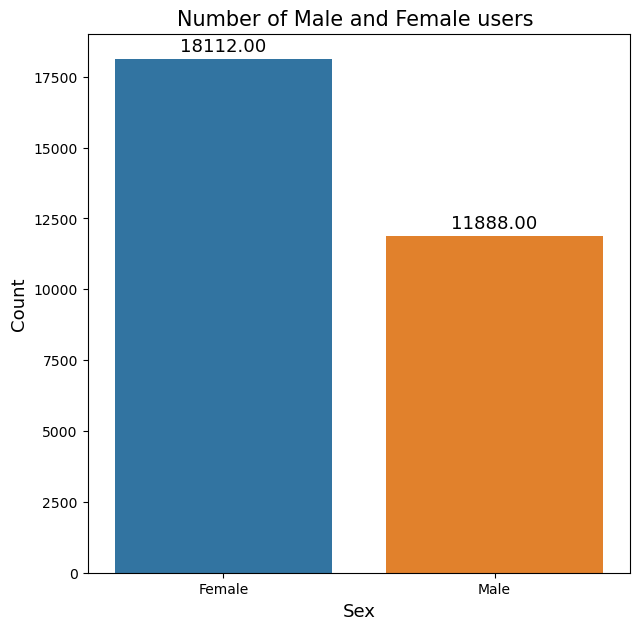

In [24]:
# Chart - 1 visualization code
plt.figure(figsize=(7,7))
plot_sex_uni=sns.countplot(x='SEX',data=df)
for bar in plot_sex_uni.patches:
  plot_sex_uni.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Sex',size=13)
plt.ylabel('Count',size=13)
plt.title('Number of Male and Female users ',size=15)


##### 1. Why did you pick the specific chart?

To observe the sex of the credit card users.

##### 2. What is/are the insight(s) found from the chart?

Majority of the Credit Card users are females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

### Marital status of the Credit Card users

Text(0.5, 1.0, 'Number of users with different marital status ')

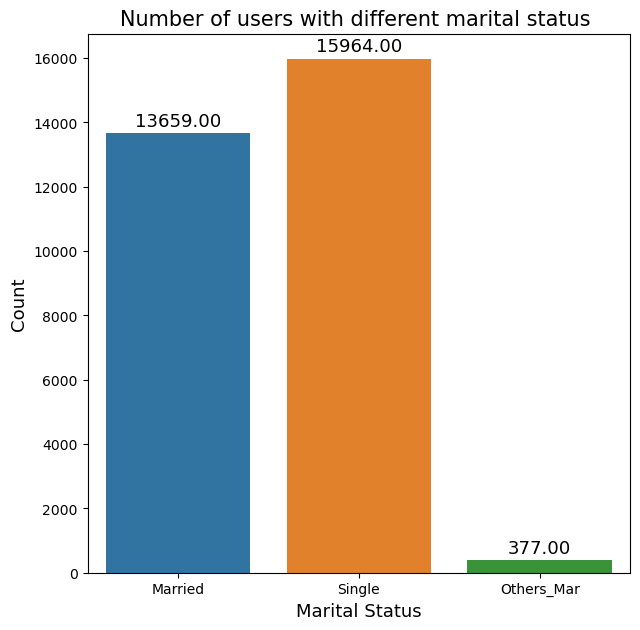

In [25]:
# Chart - 2 visualization code
plt.figure(figsize=(7,7))
plot_mr_uni=sns.countplot(x='MARRIAGE',data=df)
for bar in plot_mr_uni.patches:
  plot_mr_uni.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Marital Status',size=13)
plt.ylabel('Count',size=13)
plt.title('Number of users with different marital status ',size=15)

##### 1. Why did you pick the specific chart?

To observe the marital status of the users.

##### 2. What is/are the insight(s) found from the chart?

Majority of the Credit Card users are Single.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

### Education of the Credit Card users

Text(0.5, 1.0, 'Number of users with different Education received ')

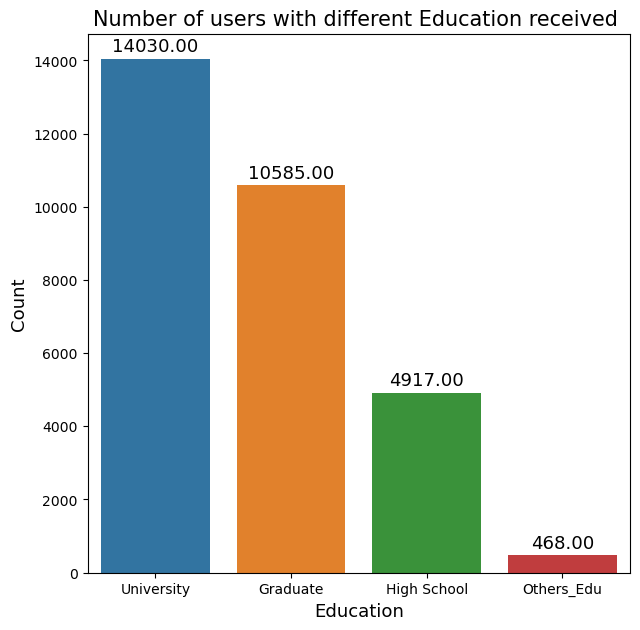

In [26]:
# Chart - 3 visualization code
plt.figure(figsize=(7,7))
plot_edu_uni=sns.countplot(x='EDUCATION',data=df)
for bar in plot_edu_uni.patches:
  plot_edu_uni.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Education',size=13)
plt.ylabel('Count',size=13)
plt.title('Number of users with different Education received ',size=15)

##### 1. Why did you pick the specific chart?

To observe the education received by the users.

##### 2. What is/are the insight(s) found from the chart?

Majority of the Credit Card users have studied in an University.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

### Payment Status of the last 6 months.

In [27]:
# Chart - 4 visualization code
#Defining a function to visualize the countplots of relevant variables
def uv_analysis(data,uv_var):
  plt.figure(figsize=(15,8))
  
  sns.countplot(data[uv_var])
  plt.title(uv_var)
  plt.show
def plot_uv(data,uv_list):
  for i in uv_list:
    plot=uv_analysis(data,i)
  return plot

uvanalysis_list=['PAY_SEPT','PAY_AUG','PAY_JULY','PAY_JUN','PAY_MAY','PAY_APR']

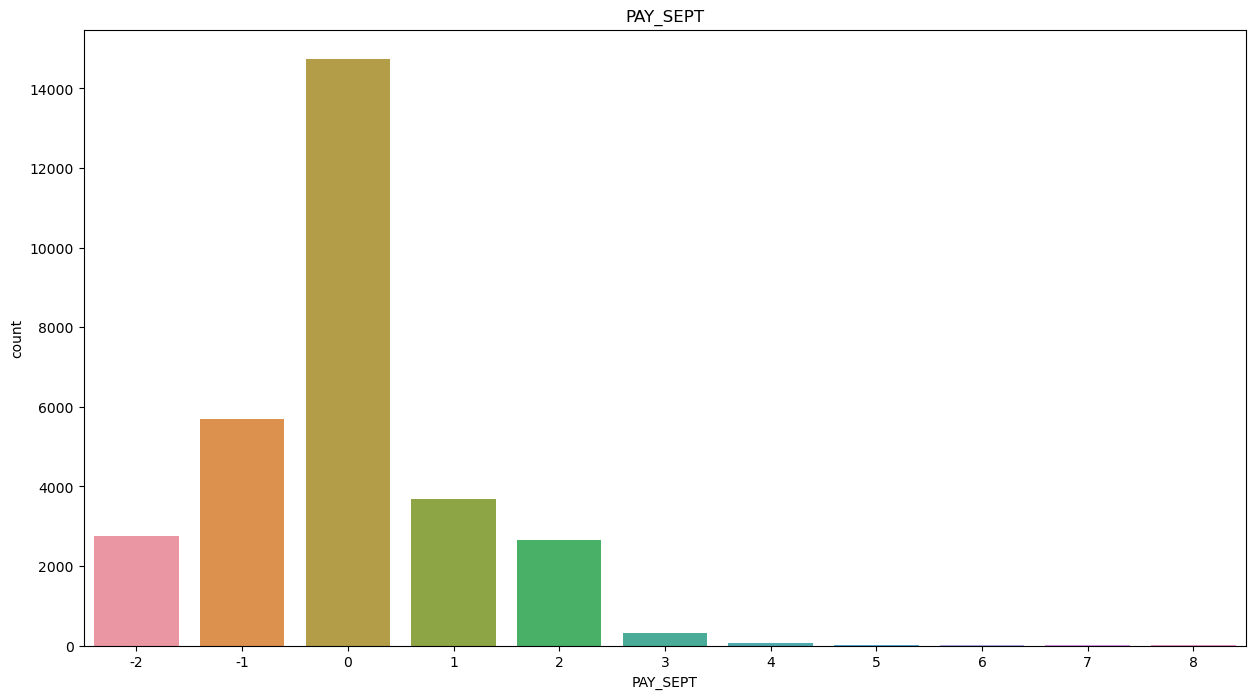

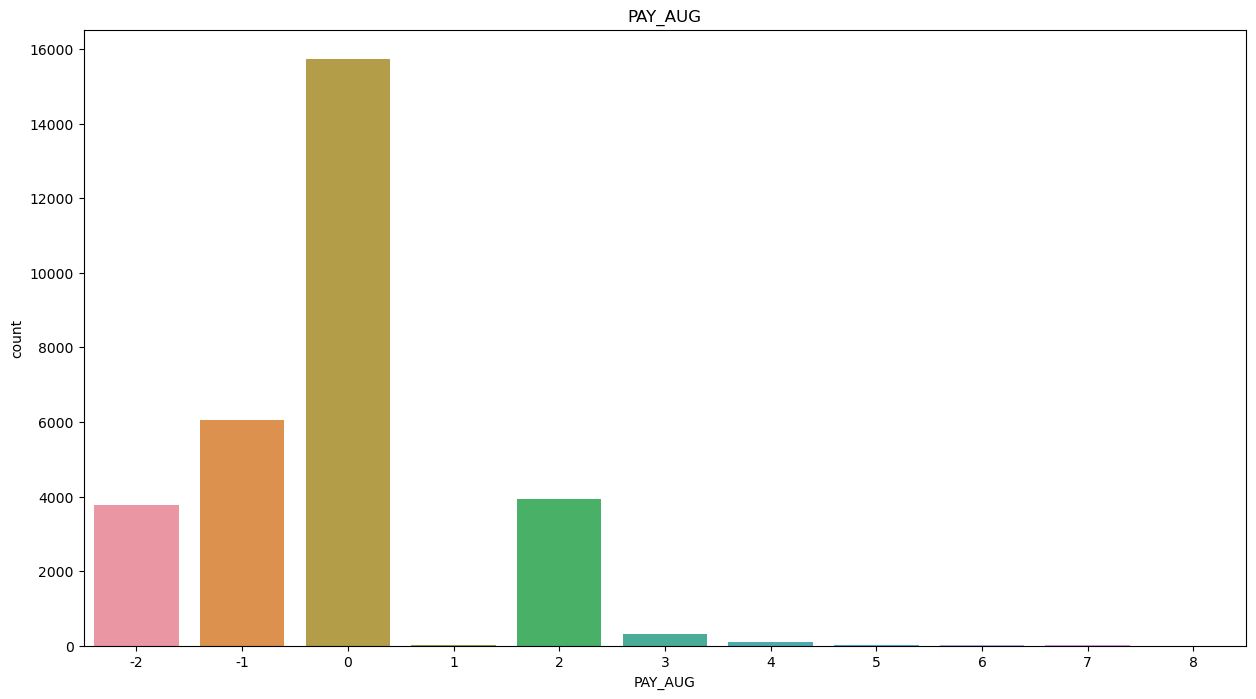

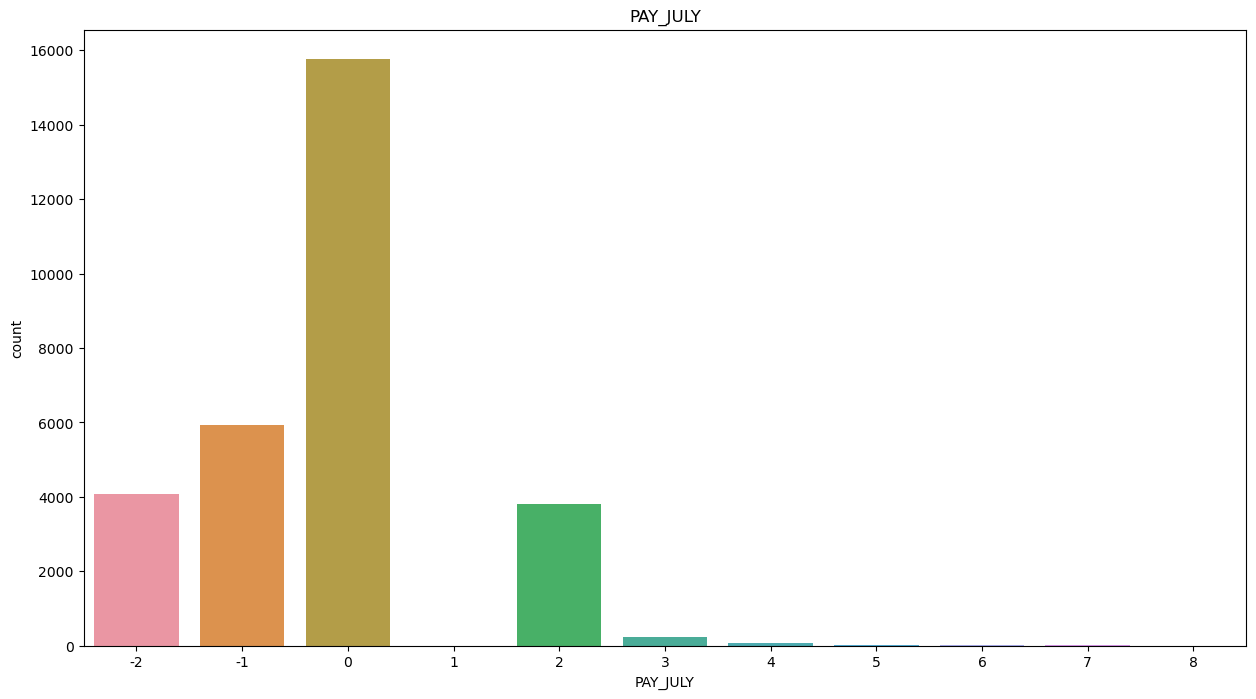

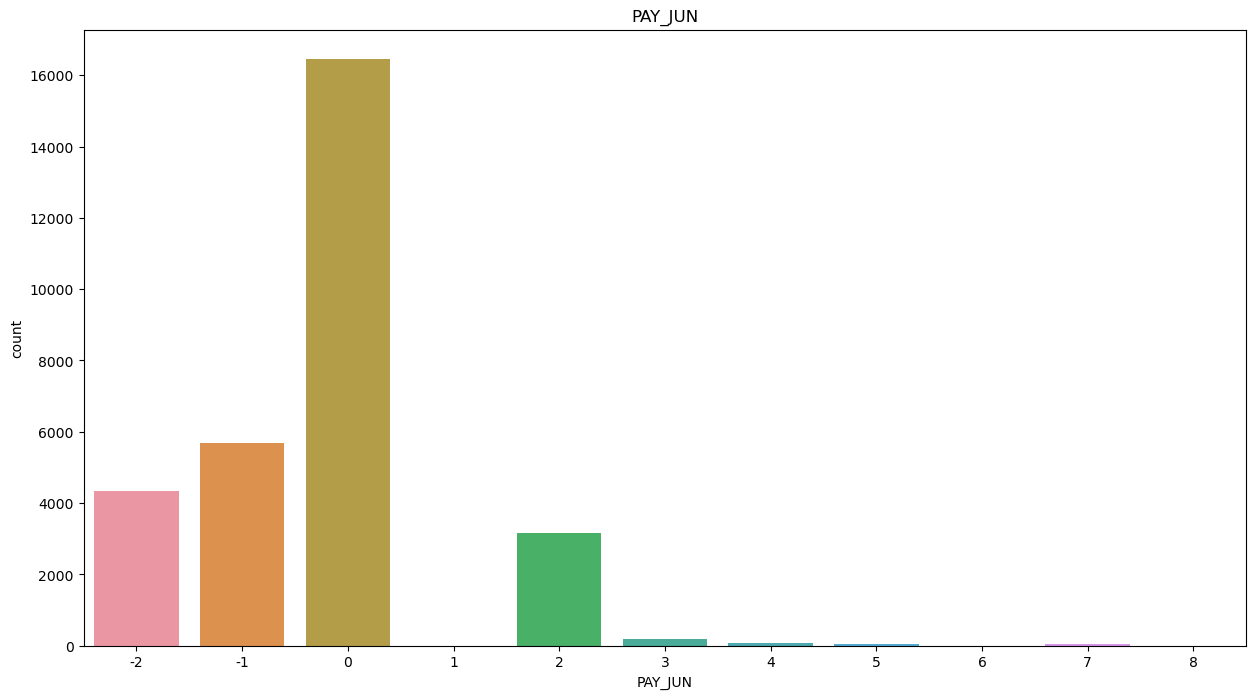

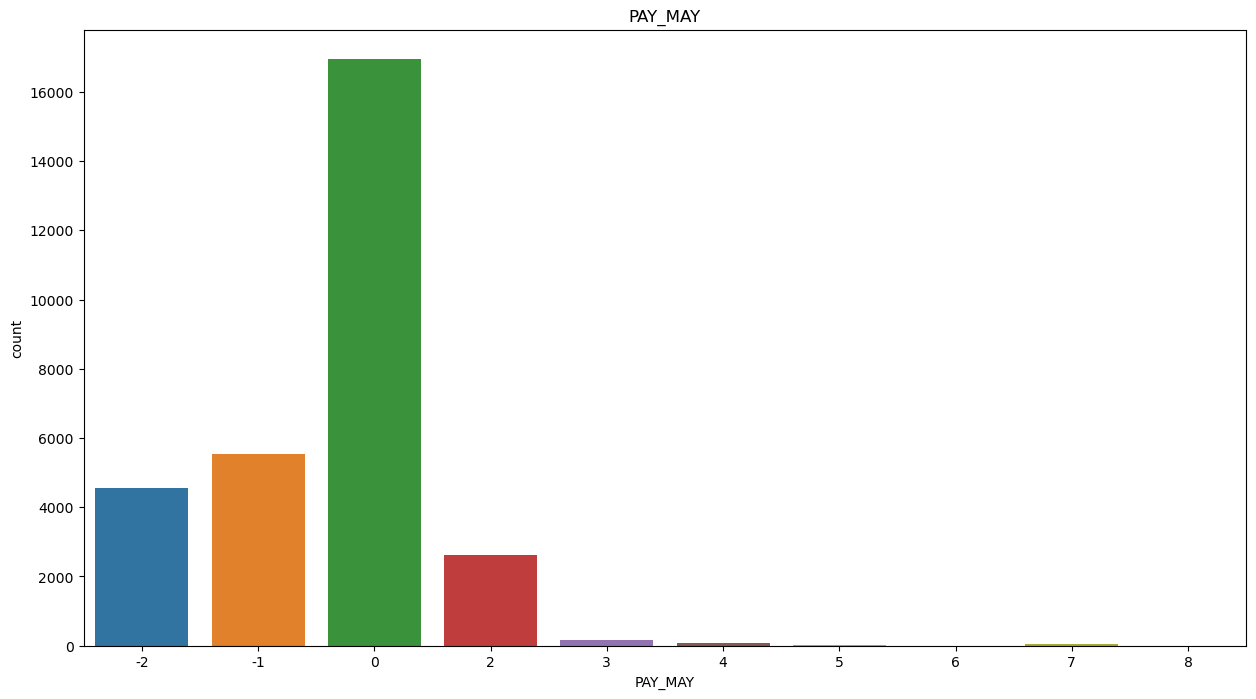

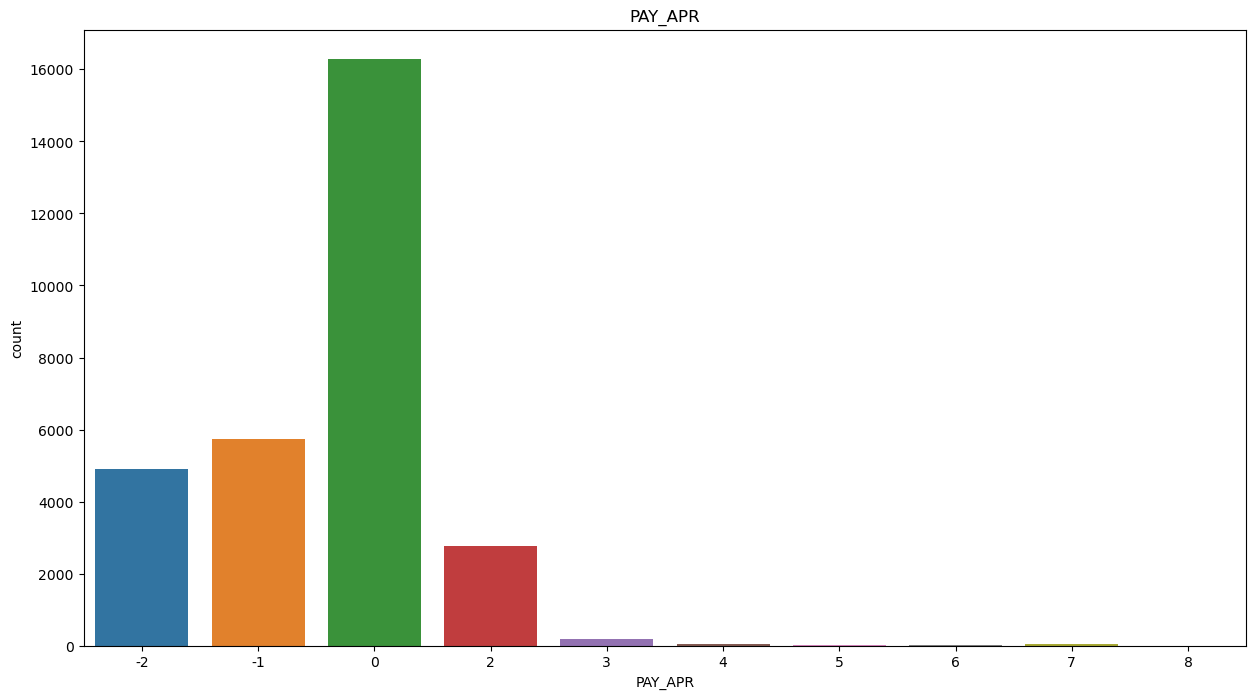

In [28]:
plot_uv(df,uvanalysis_list)

##### 1. Why did you pick the specific chart?

To observe the payment status of past 6 months of the users

##### 2. What is/are the insight(s) found from the chart?

Most of the users have paid their last 6 month dues on time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Bivariate Analysis**

In [29]:
sex_df=df.groupby('SEX')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
sex_df=sex_df[sex_df['default payment next month']==1]
mr_df=df.groupby('MARRIAGE')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
mr_df=mr_df[mr_df['default payment next month']==1]
ed_df=df.groupby('EDUCATION')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
ed_df=ed_df[ed_df['default payment next month']==1]


#### Chart - 5

### Sex of the defaulters

Text(0.5, 1.0, 'User Sex vs Default %')

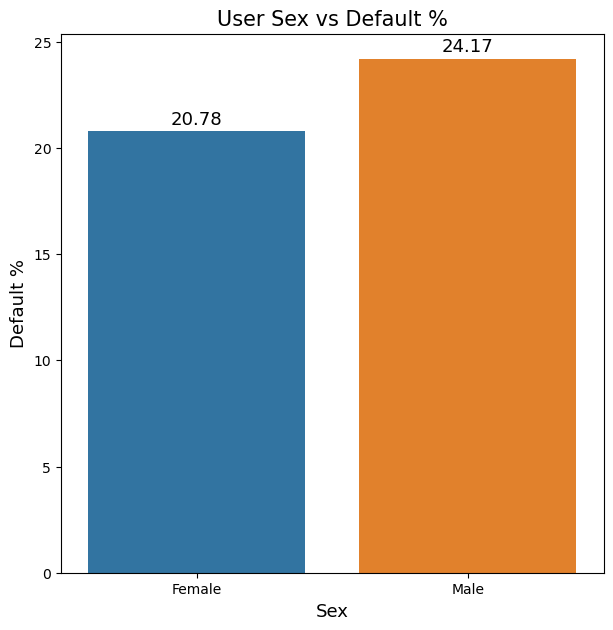

In [30]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
plot_sex=sns.barplot(data=sex_df,x='SEX',y='Percentage')
for bar in plot_sex.patches:
  plot_sex.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Sex',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Sex vs Default %',size=15)

##### 1. Why did you pick the specific chart?

To observe the default % w.r.t sex of the users.

##### 2. What is/are the insight(s) found from the chart?

Male users tend to default on their payments more than female users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

### Marital Status of the defaulters.

Text(0.5, 1.0, 'User Marital Status vs Default %')

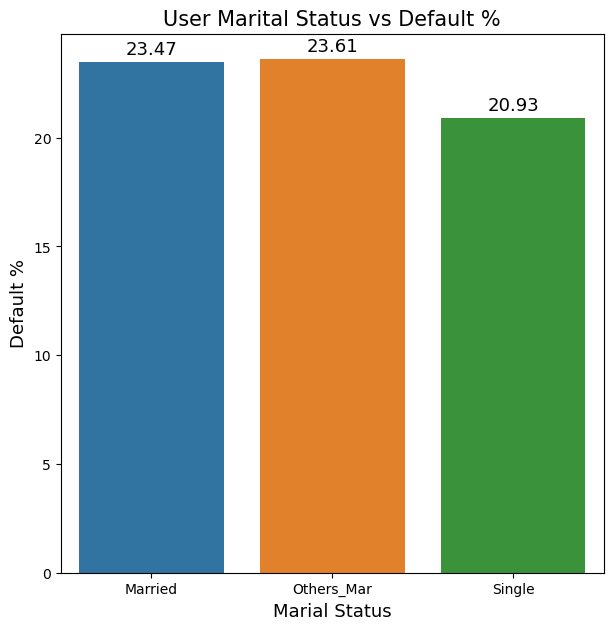

In [31]:
# Chart - 6 visualization code
plt.figure(figsize=(7,7))
plot_mr=sns.barplot(data=mr_df,x='MARRIAGE',y='Percentage')
for bar in plot_mr.patches:
  plot_mr.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Marial Status',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Marital Status vs Default %',size=15)

##### 1. Why did you pick the specific chart?

To observe the default % w.r.t marital status of the users.

##### 2. What is/are the insight(s) found from the chart?

Married users tend to default more on their payments comparatively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

### Education received by the defaulters

Text(0.5, 1.0, 'User Education vs Default %')

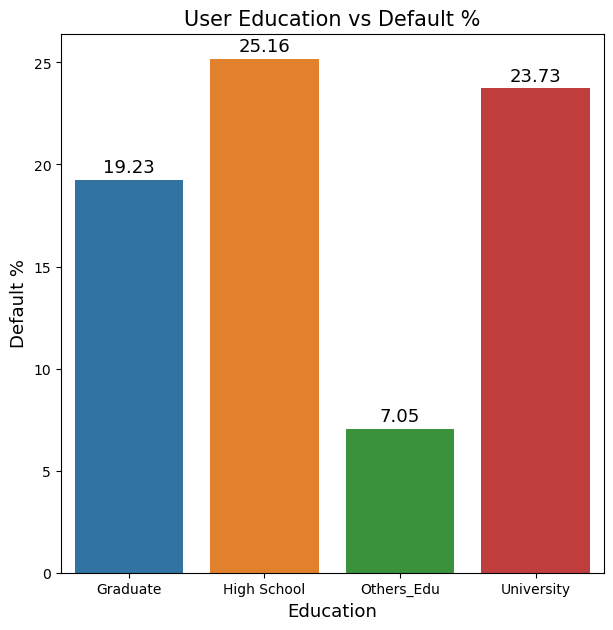

In [32]:
# Chart - 7 visualization code
plt.figure(figsize=(7,7))
plot_ed=sns.barplot(data=ed_df,x='EDUCATION',y='Percentage')
for bar in plot_ed.patches:
  plot_ed.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Education',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Education vs Default %',size=15)

##### 1. Why did you pick the specific chart?

To observe the default % w.r.t education received by the users.

##### 2. What is/are the insight(s) found from the chart?

Users who have passed high school have higher tendency to default on their payments followed by those who have been to University.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

### Age group of the defaulters

In [33]:
#Dividing the ages into groups
age_list=df['AGE']
age_group=['20-40' if i>20 and i<=40 else'40-60' if i>40 and i<=60 else '60' for i in age_list]
df['Age_group']=age_group

In [34]:
ag_df=df.groupby('Age_group')['default payment next month'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
ag_df=ag_df[ag_df['default payment next month']==1]

Text(0.5, 1.0, 'User Age Group vs Default %')

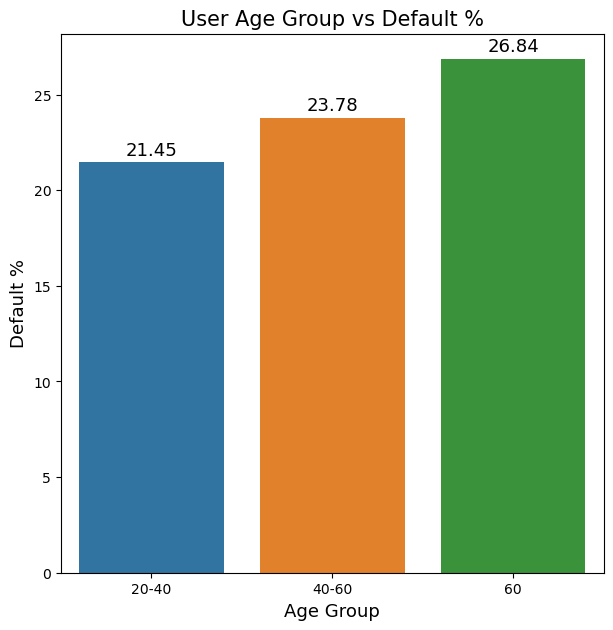

In [35]:
# Chart - 8 visualization code
plt.figure(figsize=(7,7))
plot_ag=sns.barplot(data=ag_df,x='Age_group',y='Percentage')
for bar in plot_ag.patches:
  plot_ag.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=13,xytext=(0,9),textcoords='offset points')
plt.xlabel('Age Group',size=13)
plt.ylabel('Default %',size=13)
plt.title('User Age Group vs Default %',size=15)

In [36]:
df.drop(['Age_group'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To observe the default % w.r.t various age groups.

##### 2. What is/are the insight(s) found from the chart?

Also, users above the age of 60 have higher tendency to default on their payments comparatively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

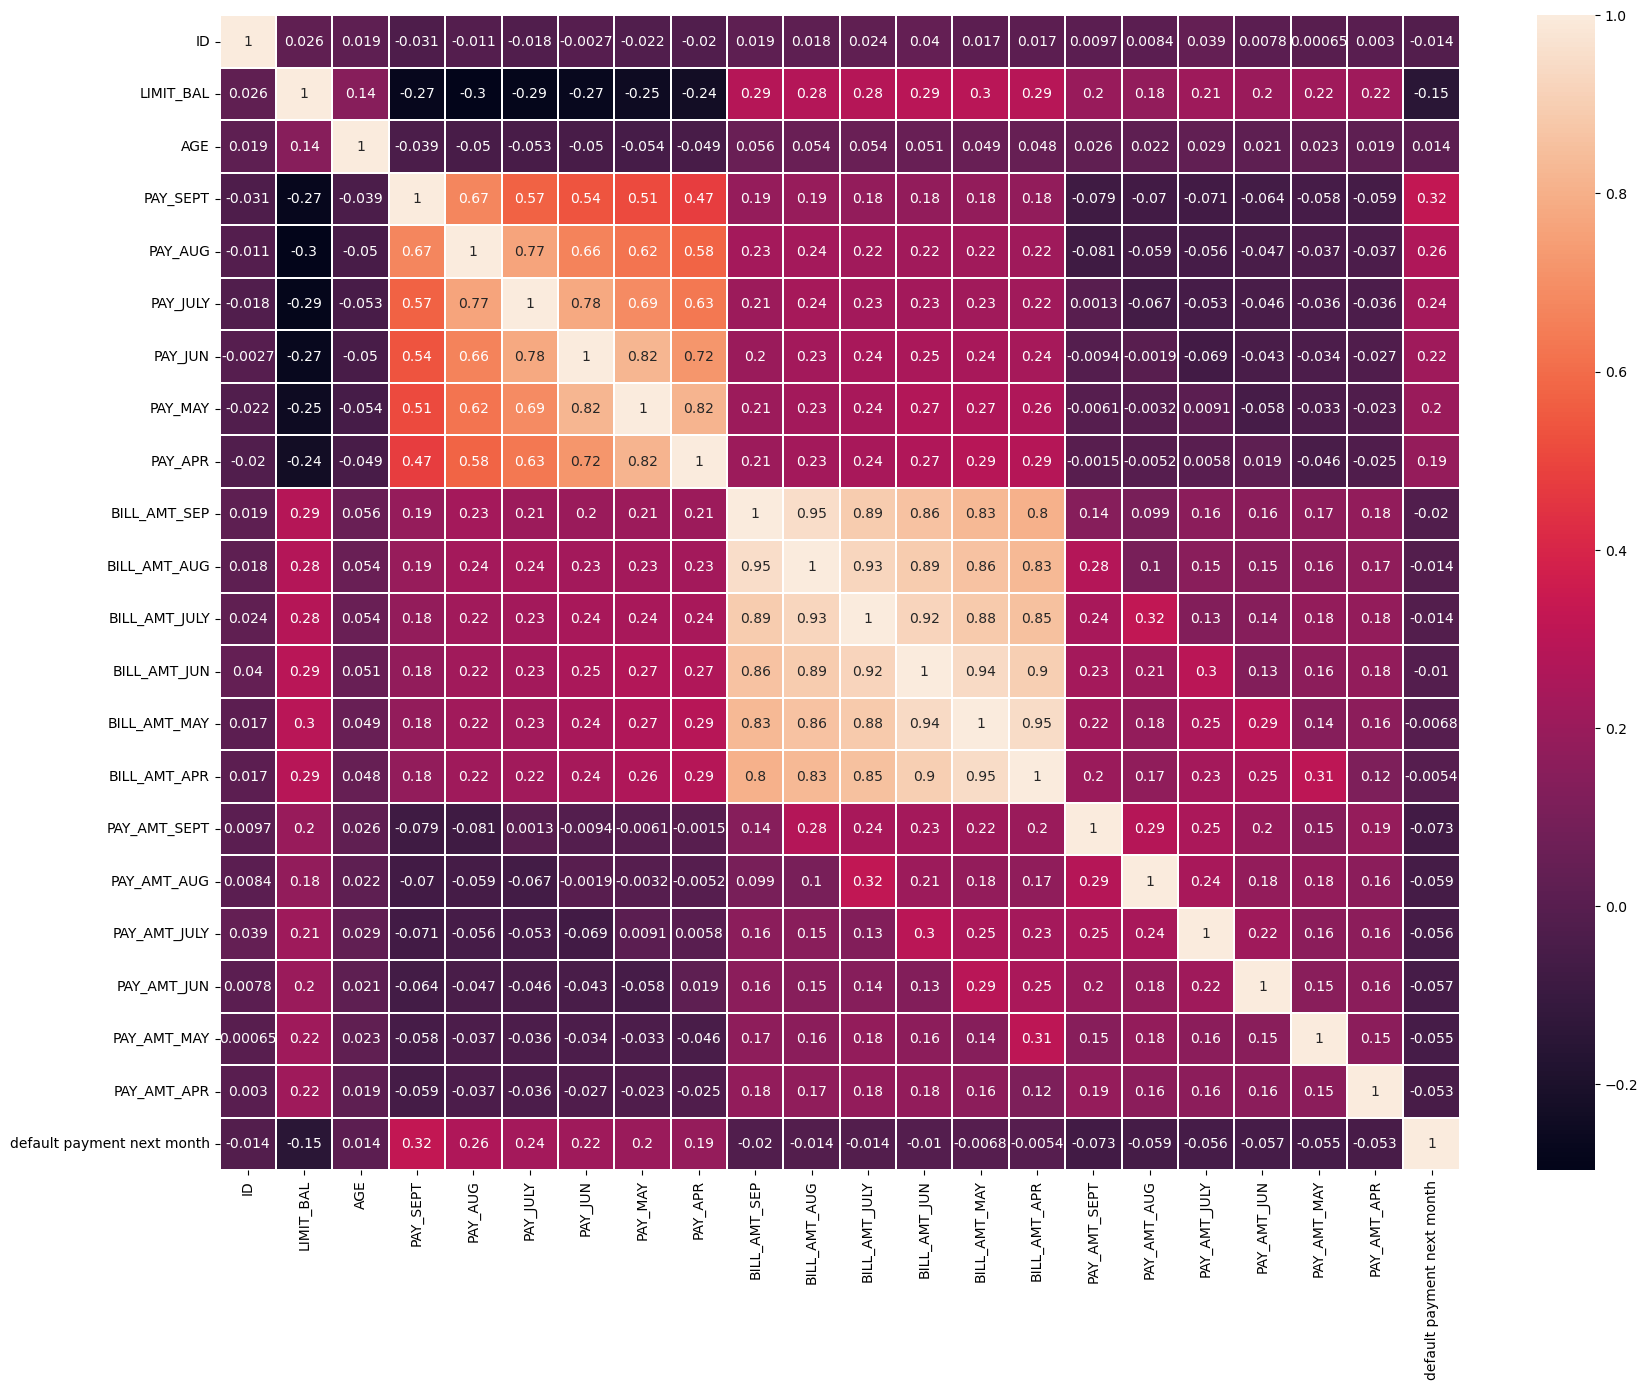

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='pearson'),annot=True,linewidths=0.2)

##### 1. Why did you pick the specific chart?

To observe the correlation among the features

##### 2. What is/are the insight(s) found from the chart?

There are features having low, moderate and also high correlation but due to belonging to the same category. So it can be ignored.

#### Chart - 15 - Pair Plot 

In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df,kind='scatter',vars=['LIMIT_BAL','AGE','BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'])

##### 1. Why did you pick the specific chart?

To understand the relationship between various features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is a difference between the population and sample mean of the ages of the users.
2. The age feature is normally distributed.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- There is no difference between the population mean and sample mean of the ages of the users.

Alternate Hypothesis- There is a difference between the population and sample mean of the ages of the users.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
age_list=list(df['AGE'])
mean_age=np.mean(age_list)

sample_size=2000
mean_age

In [ ]:
age_sample=np.random.choice(age_list,sample_size)
age_sample

In [ ]:
from scipy.stats import ttest_1samp

ttest,p_value=ttest_1samp(age_sample,35)
p_value

In [ ]:
if p_value <0.05:
  print('We reject the null hypothesis')
else:
  print('We fail to reject the null hypothesis')

##### Which statistical test have you done to obtain P-Value?

I have used the One Sample T-test.

##### Why did you choose the specific statistical test?

One Sample T test is an appropriate statistical test to observe the difference between the sample and population mean in a variable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- Age feature is normally distributed.

Alternate Hypothesis- Age feature is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_var=df['AGE']
stat,p_value=shapiro(test_var)
print(p_value)
if p_value <0.05:
  print('We reject the null hypothesis\n\n')
else:
  print('We fail to reject the null hypothesis\n\n')

##### Which statistical test have you done to obtain P-Value?

I have used the Shapiro Wilk test.

##### Why did you choose the specific statistical test?

Shapiro Wilk test is an appropriate test to see if the feature is normally distributed.

In [ ]:
#Creating a dummy dataset and encoding various variables back to their usual form
df_dummy=df.copy()
df_dummy=df_dummy.replace({'SEX':{'Female':0,'Male':1}})
df_dummy=df_dummy.replace({'EDUCATION':{'Graduate':1,'University':2,'High School':3,'Others_Edu':4}})
df_dummy=df_dummy.replace({'MARRIAGE':{'Married':1,'Single':2,'Others_Mar':3}})
x=df_dummy.drop(['default payment next month'],axis=1)
y=df_dummy['default payment next month']

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
sns.countplot(df_dummy['default payment next month'])

We observe that there is a considerable degree of imbalance in our dependent variable. Hence we will use SMOTE (Synthetic Minority Oversampling TEchnique) to oversample the minority labels in order to overcome it.

In [ ]:
! pip install imblearn

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [ ]:
columns=list(df.columns)
columns.pop(-1)
df_copy_1=pd.DataFrame(x_sm,columns=columns)
df_copy_1['default payment next month']=y_sm

In [ ]:
df_copy_1['default payment next month'].value_counts()

In [ ]:
#Comparing the labels in the dependent variable after smote through a countplot
sns.countplot(df_copy_1['default payment next month'])

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_copy=df_copy_1.copy()
df_copy['EDUCATION'].replace({1:'Graduate',2:'University',3:'High School',4:'Others_Edu'},inplace=True)
df_copy['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others_Mar'},inplace=True)



In [ ]:
df_copy=pd.get_dummies(df_copy,columns=['MARRIAGE','EDUCATION'])


In [ ]:
df_copy.columns

In [ ]:
df_copy=pd.get_dummies(df_copy,columns=['PAY_APR','PAY_MAY','PAY_JUN','PAY_JULY','PAY_AUG','PAY_SEPT'],drop_first=True)

In [ ]:
df_copy.shape

In [ ]:
#Defining X and Y variables in our final dataset
x=df_copy.drop(['default payment next month'],axis=1)
y=df_copy['default payment next month']


#### What all categorical encoding techniques have you used & why did you use those techniques?

One Hot Encoding was used to encode the variables as it is an effective and widely used method. Also, the dataset did not have any information for Ordinal Encoding.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#Observing the distribution of the variables
def diagnostic_plot(data,variable):
  
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.title(variable)
  
 
  plt.subplot(1,2,2)
  stats.probplot(data[variable],dist='norm',plot=plt)
  plt.show()
#Defining a function to plot the distribution of relevant variables
def plot_features(data,list_variable):
  for i in list_variable:
    plot=diagnostic_plot(data,i)
  return plot

In [ ]:
list_features=['LIMIT_BAL','AGE', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',]

In [ ]:
plot_features(df_copy,list_features)

It is observed that most of the data has almost gaussian distribution. So there is no need of transforming the data.

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
#Scaling the independent features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dimensions of the data is reasonable and so dimensionality reduction is not needed.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

##### What data splitting ratio have you used and why? 

I have used 4:1 ratio for train and test data. It gives the opportunity to the model to train well on the train data as well adequate test data to test and evaluate the model.

## ***7. ML Model Implementation***

### ML Model - 1

## Logistic Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

lrc=LogisticRegression()
# Fit the Algorithm
lrc.fit(x_train,y_train)
# Predict on the model
y_pred_test_lrc=lrc.predict(x_test)
y_pred_train_lrc=lrc.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
eval_metr(y_train,y_pred_train_lrc)

In [ ]:
# Visualizing evaluation Metric Score chart
#Train metrics
tr_rs_lrc=rs(y_train,y_pred_train_lrc)
tr_ps_lrc=ps(y_train,y_pred_train_lrc)
tr_ac_lrc=ac(y_train,y_pred_train_lrc)
tr_f1_lrc=f1(y_train,y_pred_train_lrc)
#Test metrics
ts_rs_lrc=rs(y_test,y_pred_test_lrc)
ts_ps_lrc=ps(y_test,y_pred_test_lrc)
ts_ac_lrc=ac(y_test,y_pred_test_lrc)
ts_f1_lrc=f1(y_test,y_pred_test_lrc)
print("Train accuracy: ",tr_ac_lrc)
print("Train recall: ",tr_rs_lrc)
print("Train precision: ",tr_ps_lrc)
print("Train f1 score: ",tr_f1_lrc)
print("Test accuracy: ",ts_ac_lrc)
print("Test recall: ",ts_rs_lrc)
print("Test precision: ",ts_ps_lrc)
print("Test f1 score: ",ts_f1_lrc)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={
    
    'C':[1e-5,1e-4,1e-3,1e-2,5e-1,9e-1,1],
    
    'max_iter':[150,200,500,1000],
}
clf=GridSearchCV(lrc,params,cv=5,return_train_score=False)
clf.fit(x_train,y_train)
print('best_score: ',clf.best_score_)
print('best_params: ',clf.best_params_)


In [ ]:
# Fit the Algorithm
lr=LogisticRegression(max_iter=150,C=0.9)
lr.fit(x_train,y_train)
# Predict on the model
y_pred_test_lr=lr.predict(x_test)
y_pred_train_lr=lr.predict(x_train)

In [ ]:
#Train metrics
tr_rs_lr=rs(y_train,y_pred_train_lr)
tr_ps_lr=ps(y_train,y_pred_train_lr)
tr_ac_lr=ac(y_train,y_pred_train_lr)
tr_f1_lr=f1(y_train,y_pred_train_lr)
#Test metrics
ts_rs_lr=rs(y_test,y_pred_test_lr)
ts_ps_lr=ps(y_test,y_pred_test_lr)
ts_ac_lr=ac(y_test,y_pred_test_lr)
ts_f1_lr=f1(y_test,y_pred_test_lr)
print("Train accuracy: ",tr_ac_lr)
print("Train recall: ",tr_rs_lr)
print("Train precision: ",tr_ps_lr)
print("Train f1 score: ",tr_f1_lr)
print("Test accuracy: ",ts_ac_lr)
print("Test recall: ",ts_rs_lr)
print("Test precision: ",ts_ps_lr)
print("Test f1 score: ",ts_f1_lr)


In [ ]:
sns.heatmap(cm(y_test,y_pred_test_lr),annot=True,fmt='g')
plt.title('Logistic Regression',size=15)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement has been seen in all aspects and can be observed from the evaluation chart.

### ML Model - 2

## Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Fit the Algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#Predict using the model
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [ ]:
# Visualizing evaluation Metric Score chart
#Train metrics
tr_rs_rf=rs(y_train,y_pred_train_rf)
tr_ps_rf=ps(y_train,y_pred_train_rf)
tr_ac_rf=ac(y_train,y_pred_train_rf)
tr_f1_rf=f1(y_train,y_pred_train_rf)
#Test metrics
ts_rs_rf=rs(y_test,y_pred_test_rf)
ts_ps_rf=ps(y_test,y_pred_test_rf)
ts_ac_rf=ac(y_test,y_pred_test_rf)
ts_f1_rf=f1(y_test,y_pred_test_rf)
print("Train accuracy: ",tr_ac_rf)
print("Train recall: ",tr_rs_rf)
print("Train precision: ",tr_ps_rf)
print("Train f1 score: ",tr_f1_rf)
print("Test accuracy: ",ts_ac_rf)
print("Test recall: ",ts_rs_rf)
print("Test precision: ",ts_ps_rf)
print("Test f1 score: ",ts_f1_rf)

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_rf),annot=True,fmt='g')
plt.title('Random Forest',size=15)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params={
    
    'n_estimators':[5,10,20,100],
    
    'max_depth':[4,6,8,10,20],
}
clf_rfc=GridSearchCV(rf,params,cv=5,return_train_score=False)
clf_rfc.fit(x_train,y_train)
print('best_score: ',clf_rfc.best_score_)
print('best_params: ',clf_rfc.best_params_)


In [ ]:
# Fit the Algorithm
rfc=RandomForestClassifier(max_depth=20,n_estimators=100)
rfc.fit(x_train,y_train)
# Predict on the model
y_pred_train_rfc=rfc.predict(x_train)
y_pred_test_rfc=rfc.predict(x_test)

In [ ]:
#Train metrics
tr_rs_rfc=rs(y_train,y_pred_train_rfc)
tr_ps_rfc=ps(y_train,y_pred_train_rfc)
tr_ac_rfc=ac(y_train,y_pred_train_rfc)
tr_f1_rfc=f1(y_train,y_pred_train_rfc)
#Test metrics
ts_rs_rfc=rs(y_test,y_pred_test_rfc)
ts_ps_rfc=ps(y_test,y_pred_test_rfc)
ts_ac_rfc=ac(y_test,y_pred_test_rfc)
ts_f1_rfc=f1(y_test,y_pred_test_rfc)
print("Train accuracy: ",tr_ac_rfc)
print("Train recall: ",tr_rs_rfc)
print("Train precision: ",tr_ps_rfc)
print("Train f1 score: ",tr_f1_rfc)
print("Test accuracy: ",ts_ac_rfc)
print("Test recall: ",ts_rs_rfc)
print("Test precision: ",ts_ps_rfc)
print("Test f1 score: ",ts_f1_rfc)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was seen.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

## Gaussian Naive Bayes

In [ ]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-30)

# Fit the Algorithm
gnb.fit(x_train,y_train)
# Predict on the model
y_pred_train_gnb=gnb.predict(x_train)
y_pred_test_gnb=gnb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Train metrics
tr_rs_gnb=rs(y_train,y_pred_train_gnb)
tr_ps_gnb=ps(y_train,y_pred_train_gnb)
tr_ac_gnb=ac(y_train,y_pred_train_gnb)
tr_f1_gnb=f1(y_train,y_pred_train_gnb)
#Test metrics
ts_rs_gnb=rs(y_test,y_pred_test_gnb)
ts_ps_gnb=ps(y_test,y_pred_test_gnb)
ts_ac_gnb=ac(y_test,y_pred_test_gnb)
ts_f1_gnb=f1(y_test,y_pred_test_gnb)
print("Train accuracy: ",tr_ac_gnb)
print("Train recall: ",tr_rs_gnb)
print("Train precision: ",tr_ps_gnb)
print("Train f1 score: ",tr_f1_gnb)
print("Test accuracy: ",ts_ac_gnb)
print("Test recall: ",ts_rs_gnb)
print("Test precision: ",ts_ps_gnb)
print("Test f1 score: ",ts_f1_gnb)

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_gnb),annot=True,fmt='g')
plt.title('Gaussian Naive Bayes',size=15)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=2000,learning_rate=0.01,max_depth=30)
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

In [ ]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)
#Train metrics
tr_rs_xgb=rs(y_train,y_pred_train_xgb)
tr_ps_xgb=ps(y_train,y_pred_train_xgb)
tr_ac_xgb=ac(y_train,y_pred_train_xgb)
tr_f1_xgb=f1(y_train,y_pred_train_xgb)
#Test metrics
ts_rs_xgb=rs(y_test,y_pred_test_xgb)
ts_ps_xgb=ps(y_test,y_pred_test_xgb)
ts_ac_xgb=ac(y_test,y_pred_test_xgb)
ts_f1_xgb=f1(y_test,y_pred_test_xgb)
print("Train accuracy: ",tr_ac_xgb)
print("Train recall: ",tr_rs_xgb)
print("Train precision: ",tr_ps_xgb)
print("Train f1 score: ",tr_f1_xgb)
print("Test accuracy: ",ts_ac_xgb)
print("Test recall: ",ts_rs_xgb)
print("Test precision: ",ts_ps_xgb)
print("Test f1 score: ",ts_f1_xgb)


In [ ]:
sns.heatmap(cm(y_test,y_pred_test_xgb),annot=True,fmt='g')
plt.title('XG Boost',size=15)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=10)
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

In [ ]:
y_pred_test_dc=dc.predict(x_test)
y_pred_train_dc=dc.predict(x_train)


In [ ]:

#Train metrics
tr_rs_dc=rs(y_train,y_pred_train_dc)
tr_ps_dc=ps(y_train,y_pred_train_dc)
tr_ac_dc=ac(y_train,y_pred_train_dc)
tr_f1_dc=f1(y_train,y_pred_train_dc)
#Test metrics
ts_rs_dc=rs(y_test,y_pred_test_dc)
ts_ps_dc=ps(y_test,y_pred_test_dc)
ts_ac_dc=ac(y_test,y_pred_test_dc)
ts_f1_dc=f1(y_test,y_pred_test_dc)
print("Train accuracy: ",tr_ac_dc)
print("Train recall: ",tr_rs_dc)
print("Train precision: ",tr_ps_dc)
print("Train f1 score: ",tr_f1_dc)
print("Test accuracy: ",ts_ac_dc)
print("Test recall: ",ts_rs_dc)
print("Test precision: ",ts_ps_dc)
print("Test f1 score: ",ts_f1_dc)

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_dc),annot=True,fmt='g')
plt.title('Decision Tree Classifier',size=15)

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

In [ ]:
y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn=knn.predict(x_test)

rs(y_test,y_pred_test_knn)

In [ ]:
#Train metrics
tr_rs_knn=rs(y_train,y_pred_train_knn)
tr_ps_knn=ps(y_train,y_pred_train_knn)
tr_ac_knn=ac(y_train,y_pred_train_knn)
tr_f1_knn=f1(y_train,y_pred_train_knn)
#Test metrics
ts_rs_knn=rs(y_test,y_pred_test_knn)
ts_ps_knn=ps(y_test,y_pred_test_knn)
ts_ac_knn=ac(y_test,y_pred_test_knn)
ts_f1_knn=f1(y_test,y_pred_test_knn)
print("Train accuracy: ",tr_ac_knn)
print("Train recall: ",tr_rs_knn)
print("Train precision: ",tr_ps_knn)
print("Train f1 score: ",tr_f1_knn)
print("Test accuracy: ",ts_ac_knn)
print("Test recall: ",ts_rs_knn)
print("Test precision: ",ts_ps_knn)
print("Test f1 score: ",ts_f1_knn)

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_knn),annot=True,fmt='g')
plt.title('KNN',size=15)

## Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=10)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

In [ ]:
y_pred_train_svc=svc.predict(x_train)
y_pred_test_svc=svc.predict(x_test)

In [ ]:
#Train metrics
tr_rs_svc=rs(y_train,y_pred_train_svc)
tr_ps_svc=ps(y_train,y_pred_train_svc)
tr_ac_svc=ac(y_train,y_pred_train_svc)
tr_f1_svc=f1(y_train,y_pred_train_svc)
#Test metrics
ts_rs_svc=rs(y_test,y_pred_test_svc)
ts_ps_svc=ps(y_test,y_pred_test_svc)
ts_ac_svc=ac(y_test,y_pred_test_svc)
ts_f1_svc=f1(y_test,y_pred_test_svc)
print("Train accuracy: ",tr_ac_svc)
print("Train recall: ",tr_rs_svc)
print("Train precision: ",tr_ps_svc)
print("Train f1 score: ",tr_f1_svc)
print("Test accuracy: ",ts_ac_svc)
print("Test recall: ",ts_rs_svc)
print("Test precision: ",ts_ps_svc)
print("Test f1 score: ",ts_f1_svc)

In [ ]:
sns.heatmap(cm(y_test,y_pred_test_svc),annot=True,fmt='g')
plt.title('SVC',size=15)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

While evaluating the models we will give more importance to 'recall scores' since the priority of the banks is to identify a potential defaulter.Whereas if a user is wrongly detected as a potential defaulter there will not be much problem.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 From the above tables we conclude that Random Forest,XG Boost, Gaussian Naive Bayes gives us decent recall scores that are 0.82, 0.84, 0.89 respectively.

Whereas KNN gives a very good recall score i.e 0.94.

So we can select KNN as the optimum model for our problem statement.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
def plot_importance(model, features,num=len(x_train),save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_ , 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    


plot_importance(xgb,x_train)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



**EDA Conclusions**

• The number of females that use credit cards is more than that of males.

• Single people use credit card more than others.

• Majority of the credit card users have received University level 
education

• Most of the users have paid their last six month dues on time.

• Males tend to default on their credit card payments more than females.

• Married users tend to default on their credit card payments more than 
others.

• The users who have studied till high school level tend to default on their 
credit card payments more than others.


**Model Conclusions** 

• While validating the models more importance should be given to 'recall scores' 
since the priority of the banks is to identify a potential defaulter. Whereas if a 
user is wrongly detected as a potential defaulter there will not be much problem.

• Some of the models perform bad on both the train and test data. (Logistic 
Regression, SVC). They seem to be underfitting the train data.

• Some of the models perform good on train data but not so good on the train data. 
(Decision Tree Classifier). They seem to be overfitting the train data.

• Random Forest, XG Boost, Gaussian Naïve Bayes gives us decent recall scores 
that are 0.82, 0.84, 0.89 respectively. Whereas KNN gives a very good recall score 
of 0.94.

• So we can select KNN as the optimum model for our problem statement.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***